In [413]:
import pandas as pd

df = pd.read_csv('aneel.csv')
df

,_id,DatGeracaoConjuntoDados,DscConjuntoUnidadeConsumidora,DscAlimentadorSubestacao,DscSubestacaoDistribuicao,NumOrdemInterrupcao,DscTipoInterrupcao,IdeMotivoInterrupcao,DatInicioInterrupcao,DatFimInterrupcao,DscFatoGeradorInterrupcao,NumNivelTensao,NumUnidadeConsumidora,NumConsumidorConjunto,NumAno,NomAgenteRegulado,SigAgente,NumCPFCNPJ,rank
0,4561642,2023-10-10,ITAJAÍ ITAIPAVA,IFA04,IFA,27226519/0,Não Programada,0,2023-01-02 21:20:00,2023-01-03 00:02:00,Interna/Nao Programada/Proprias do Sistema/Sob...,220,94,50565,2023,CELESC DISTRIBUIÇÃO S.A,CELESC-DIS,8336783000190,0.070624
1,4566860,2023-10-10,FRAIBURGO,CNS01,CNS,27282537/0,Não Programada,0,2023-01-12 18:29:00,2023-01-12 21:32:00,Interna/Nao Programada/Nao Classificada,220,1,22850,2023,CELESC DISTRIBUIÇÃO S.A,CELESC-DIS,8336783000190,0.070624
2,4566452,2023-10-10,TIMBO,TBO05,TBO,27277948/0,Não Programada,0,2023-01-12 09:24:00,2023-01-12 10:37:00,Interna/Nao Programada/Nao Classificada,220,1,40933,2023,CELESC DISTRIBUIÇÃO S.A,CELESC-DIS,8336783000190,0.070624
3,4566511,2023-10-10,ITUPORANGA,IAA08,IAA,27278496/0,Não Programada,0,2023-01-12 10:50:00,2023-01-12 13:25:00,Interna/Nao Programada/Nao Classificada,220,1,26693,2023,CELESC DISTRIBUIÇÃO S.A,CELESC-DIS,8336783000190,0.070624
4,4561672,2023-10-10,SEARA,SRA04,SRA,27222410/0,Não Programada,0,2023-01-03 00:59:00,2023-01-03 08:50:00,Interna/Nao Programada/Nao Classificada,23000,43,14119,2023,CELESC DISTRIBUIÇÃO S.A,CELESC-DIS,8336783000190,0.070624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133439,3584843,2023-10-10,Uniao da Vitoria,729800792-CELESC,72980-Unico da Vitsria(CSL),1011760047-15927,Não Programada,0,2023-06-14 01:22:00,2023-06-14 01:22:00,INTERNA-NAO PROGRAMADA-PROPRIAS DO SISTEMA-NAO...,34500,1,33248,2023,COPEL DISTRIBUIÇÃO S.A.,COPEL-DIS,4368898000106,0.057309
133440,3584844,2023-10-10,Uniao da Vitoria,729800792-CELESC,72980-Unico da Vitsria(CSL),1011760048-15927,Não Programada,0,2023-06-14 01:28:00,2023-06-14 01:28:00,INTERNA-NAO PROGRAMADA-PROPRIAS DO SISTEMA-NAO...,34500,1,33248,2023,COPEL DISTRIBUIÇÃO S.A.,COPEL-DIS,4368898000106,0.057309
133441,3683467,2023-10-10,Uniao da Vitoria,729800792-CELESC,72980-Unico da Vitsria(CSL),1011776778-15927,Não Programada,8,2023-08-15 08:30:00,2023-08-15 10:46:00,EXTERNA-NAO PROGRAMADA-NAO CLASSIFICADA,230000,1,33323,2023,COPEL DISTRIBUIÇÃO S.A.,COPEL-DIS,4368898000106,0.057309
133442,3707309,2023-10-10,Uniao da Vitoria,729800792-CELESC,72980-Unico da Vitsria(CSL),1011780791-15927,Não Programada,0,2023-08-27 06:15:00,2023-08-27 06:16:00,INTERNA-NAO PROGRAMADA-PROPRIAS DO SISTEMA-NAO...,34500,1,33323,2023,COPEL DISTRIBUIÇÃO S.A.,COPEL-DIS,4368898000106,0.057309


Transformando coluna em string

In [414]:
df['DscFatoGeradorInterrupcao']=df['DscFatoGeradorInterrupcao'].astype('string')


Filtrando por apenas CELESC (veio alguns dados da COPEL)

In [415]:
df = df.loc[df['SigAgente'].str.contains("CELESC-DIS")]

Fazendo o split da coluna DscFatoGeradorInterrupcao

In [416]:
df[["Int_Ext","Programada","Tipo","Descrição"]] = df["DscFatoGeradorInterrupcao"].str.split("/", expand = True).copy()

Verificar dia da semana e se é feriado (melhorar)

In [417]:
import numpy as np
from datetime import datetime as dt
df['Semana']=np.where((pd.to_datetime(df['DatInicioInterrupcao'],dayfirst=True).dt.weekday==5) | (pd.to_datetime(df['DatInicioInterrupcao'],dayfirst=True).dt.weekday==6) ,'Fim de semana','Semana')


import pandas as pd
import holidays
holiday_list = []
for holiday in holidays.Brazil(years=[2023]).items():
    holiday_list.append(holiday)

holidays_df = pd.DataFrame(holiday_list, columns=["date", "holiday"])
pd.to_datetime(holidays_df['date'])
df['Data2'] = pd.to_datetime(df['DatInicioInterrupcao'],dayfirst=True).dt.date
df=pd.merge(df,holidays_df,'left',left_on='Data2',right_on='date')
df['Feriado']=df['holiday'].isnull().map({True: 'Dia Normal',False:'Feriado'})
df=df.drop(columns=['holiday','Data2','date'])

Calcular tempo total da falta de energia em minutos

In [418]:
df['Tempo Total'] = (pd.to_datetime(df['DatFimInterrupcao'])-pd.to_datetime(df['DatInicioInterrupcao'])).dt.total_seconds()/60

In [419]:
df=df.drop(columns=["DatGeracaoConjuntoDados","NumOrdemInterrupcao","NumCPFCNPJ","rank","NomAgenteRegulado","NumAno"])

In [420]:
df['Descrição']=df['Descrição'].fillna("Não classificada")
df['Tipo']=df['Tipo'].fillna("Não classificada")

In [421]:
df

,_id,DscConjuntoUnidadeConsumidora,DscAlimentadorSubestacao,DscSubestacaoDistribuicao,DscTipoInterrupcao,IdeMotivoInterrupcao,DatInicioInterrupcao,DatFimInterrupcao,DscFatoGeradorInterrupcao,NumNivelTensao,NumUnidadeConsumidora,NumConsumidorConjunto,SigAgente,Int_Ext,Programada,Tipo,Descrição,Semana,Feriado,Tempo Total
0,4561642,ITAJAÍ ITAIPAVA,IFA04,IFA,Não Programada,0,2023-01-02 21:20:00,2023-01-03 00:02:00,Interna/Nao Programada/Proprias do Sistema/Sob...,220,94,50565,CELESC-DIS,Interna,Nao Programada,Proprias do Sistema,Sobrecarga,Semana,Dia Normal,162.0
1,4566860,FRAIBURGO,CNS01,CNS,Não Programada,0,2023-01-12 18:29:00,2023-01-12 21:32:00,Interna/Nao Programada/Nao Classificada,220,1,22850,CELESC-DIS,Interna,Nao Programada,Nao Classificada,Não classificada,Semana,Dia Normal,183.0
2,4566452,TIMBO,TBO05,TBO,Não Programada,0,2023-01-12 09:24:00,2023-01-12 10:37:00,Interna/Nao Programada/Nao Classificada,220,1,40933,CELESC-DIS,Interna,Nao Programada,Nao Classificada,Não classificada,Semana,Dia Normal,73.0
3,4566511,ITUPORANGA,IAA08,IAA,Não Programada,0,2023-01-12 10:50:00,2023-01-12 13:25:00,Interna/Nao Programada/Nao Classificada,220,1,26693,CELESC-DIS,Interna,Nao Programada,Nao Classificada,Não classificada,Semana,Dia Normal,155.0
4,4561672,SEARA,SRA04,SRA,Não Programada,0,2023-01-03 00:59:00,2023-01-03 08:50:00,Interna/Nao Programada/Nao Classificada,23000,43,14119,CELESC-DIS,Interna,Nao Programada,Nao Classificada,Não classificada,Semana,Dia Normal,471.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133432,4588837,PINHALZINHO,PZO01,PZO,Não Programada,0,2023-02-15 18:55:00,2023-02-15 19:25:00,Interna/Nao Programada/Proprias do Sistema/Nao...,23000,22,25696,CELESC-DIS,Interna,Nao Programada,Proprias do Sistema,Nao identificada,Semana,Dia Normal,30.0
133433,4588838,RIO DO SUL,RSL05,RSL,Não Programada,0,2023-02-15 18:58:00,2023-02-15 20:40:00,Interna/Nao Programada/Proprias do Sistema/Nao...,220,3,16335,CELESC-DIS,Interna,Nao Programada,Proprias do Sistema,Nao identificada,Semana,Dia Normal,102.0
133434,4588839,PINHEIRA,PPA04,PPA,Não Programada,0,2023-02-15 19:00:00,2023-02-15 19:23:00,Interna/Nao Programada/Proprias do Sistema/Fal...,220,36,14709,CELESC-DIS,Interna,Nao Programada,Proprias do Sistema,Falha de material ou equipamento,Semana,Dia Normal,23.0
133435,4588840,MAFRA,MFA07,MFA,Não Programada,0,2023-02-15 19:02:00,2023-02-15 23:32:00,Interna/Nao Programada/Meio Ambiente/Arvore ou...,220,1,32619,CELESC-DIS,Interna,Nao Programada,Meio Ambiente,Arvore ou Vegetacao,Semana,Dia Normal,270.0


# **Visualização de dados**

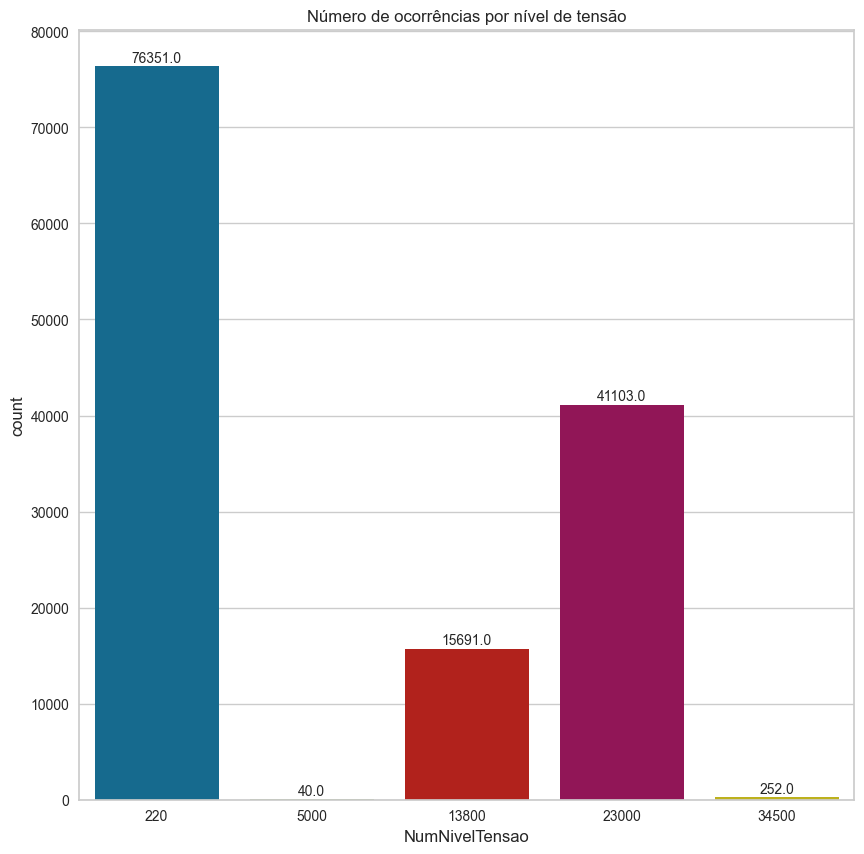

In [422]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = [10,10])
sns.countplot(df,x='NumNivelTensao')
for bar in ax.patches:
  ax.annotate(text = bar.get_height(),
                  xy = (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center',
                  va='center',
                  size=10,
                  xytext=(0, 6),
                  textcoords='offset points')
plt.title("Número de ocorrências por nível de tensão")
plt.show()

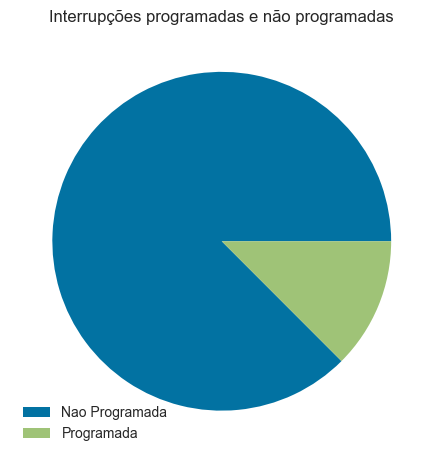

In [423]:
fig, ax = plt.subplots()
ax.pie(df['Programada'].value_counts())
label = df['Programada'].value_counts().index
ax.set_title('Interrupções programadas e não programadas')
plt.legend(label, loc="lower left")
plt.show()

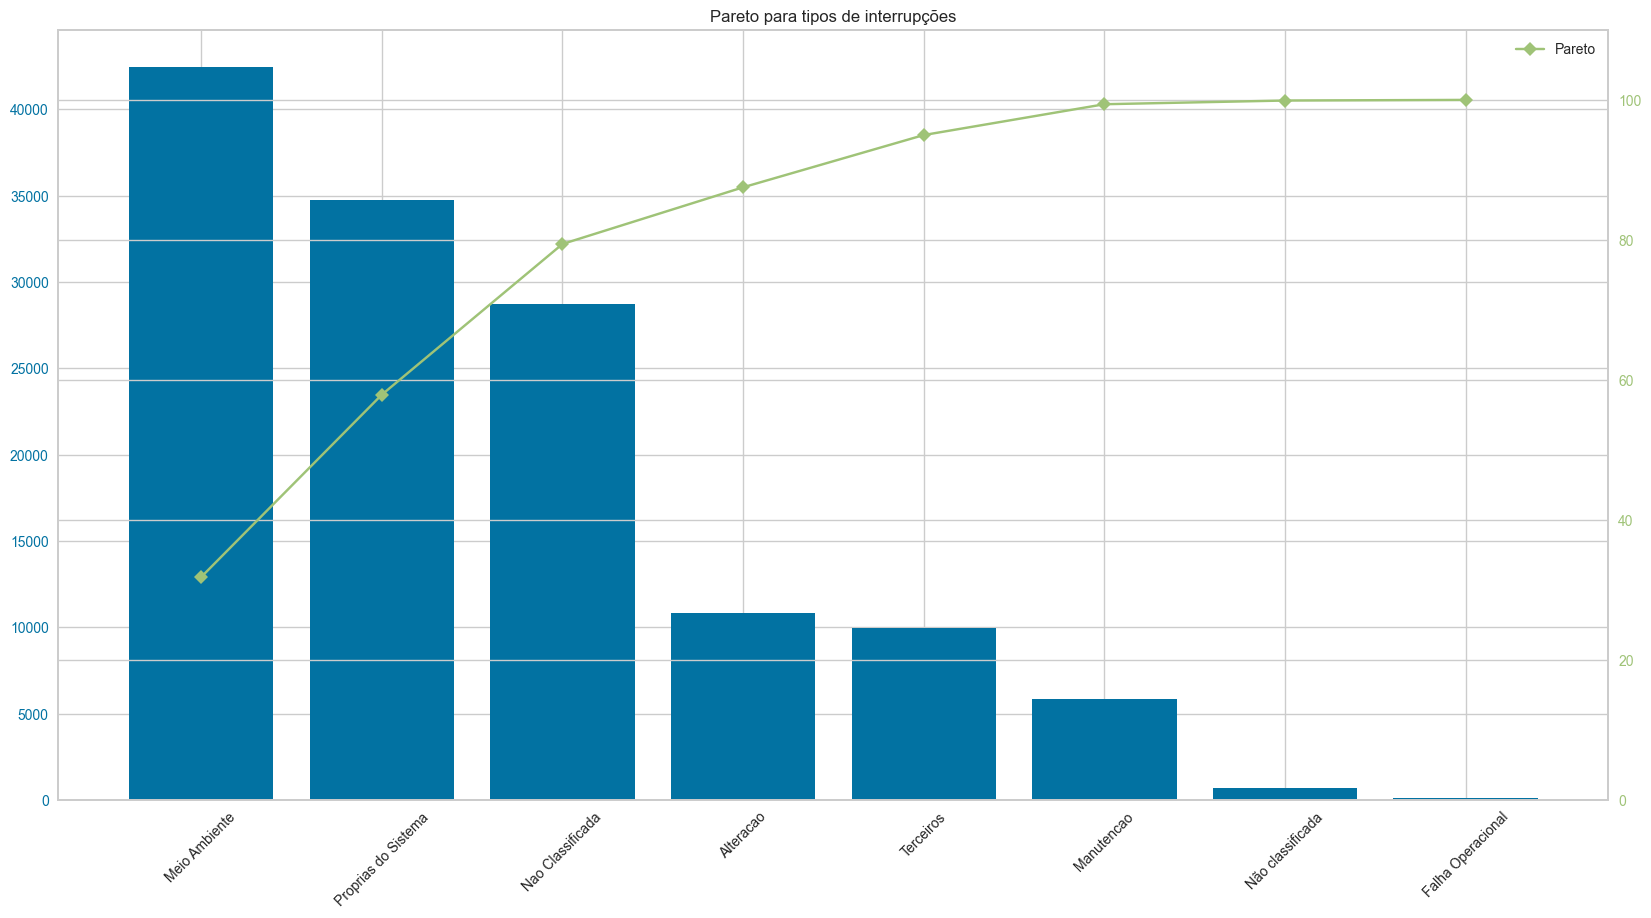

In [424]:
#Manipulação para criação do gráfico de Pareto

df_pareto = pd.DataFrame(df.groupby("Tipo", as_index=False)["Tipo"].value_counts())
df_pareto = df_pareto.sort_values(by="count",ascending=False)
df_pareto["Percent"] = df_pareto["count"]/df_pareto["count"].sum() * 100
df_pareto["CumPercent"] = df_pareto["Percent"].cumsum()

# Cria o barplot e define os dados os eixos, a cor das barras, titulo do gráfico
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(df_pareto["Tipo"], df_pareto["count"], color="C0")
ax.set_title("Pareto para tipos de interrupções")

# Eixo secundário
ax2 = ax.twinx()

# Cria a Curva de Pareto no eixo secundário
ax2.plot(df_pareto["Tipo"], df_pareto["CumPercent"], color="C1", marker="D", ms=7, label='Pareto')

# Configurações dos eixos 
ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
ax2.set_ylim([0,110])

# Ajusta a inclinação dos labels do eixo x
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

# Finalmente mostra o grafico definido acima
plt.legend() # para mostrar a legenda
plt.show()

In [425]:
teste=df.groupby("Tipo", as_index=False)["Descrição"].value_counts()
teste

,Tipo,Descrição,count
0,Alteracao,Para Ampliacao,5925
1,Alteracao,Para Melhoria,4883
2,Falha Operacional,Erro de Operacao,119
3,Manutencao,Preventiva,3792
4,Manutencao,Corretiva,2082
5,Meio Ambiente,Arvore ou Vegetacao,17985
6,Meio Ambiente,Animais,10400
7,Meio Ambiente,Vento,9022
8,Meio Ambiente,Descarga Atmosferica,5035
9,Meio Ambiente,Poluicao,40


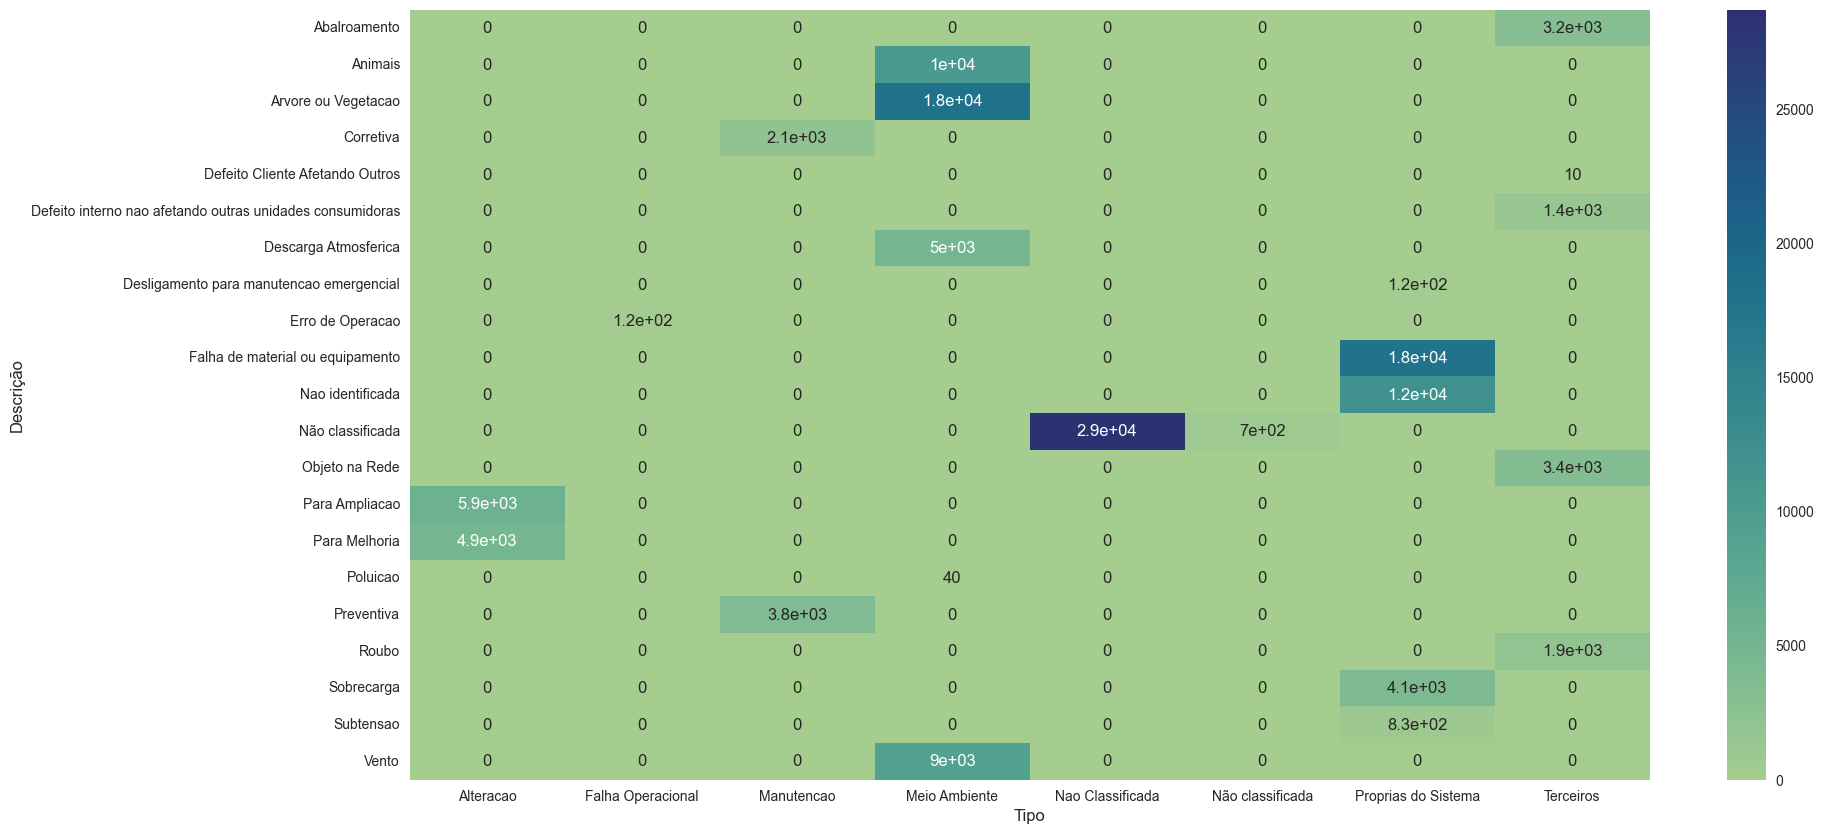

In [426]:
teste = teste.pivot(index="Descrição",columns="Tipo",values="count")
teste=teste.fillna(0)
fig, ax = plt.subplots(figsize=(20,10))
ax=sns.heatmap(teste,cmap="crest",annot=True)

plt.show()

In [427]:
teste=df.groupby("Programada", as_index=False)["Descrição"].value_counts()
teste

,Programada,Descrição,count
0,Nao Programada,Não classificada,29417
1,Nao Programada,Arvore ou Vegetacao,17985
2,Nao Programada,Falha de material ou equipamento,17788
3,Nao Programada,Nao identificada,11958
4,Nao Programada,Animais,10400
5,Nao Programada,Vento,9022
6,Nao Programada,Descarga Atmosferica,5035
7,Nao Programada,Sobrecarga,4074
8,Nao Programada,Objeto na Rede,3415
9,Nao Programada,Abalroamento,3213


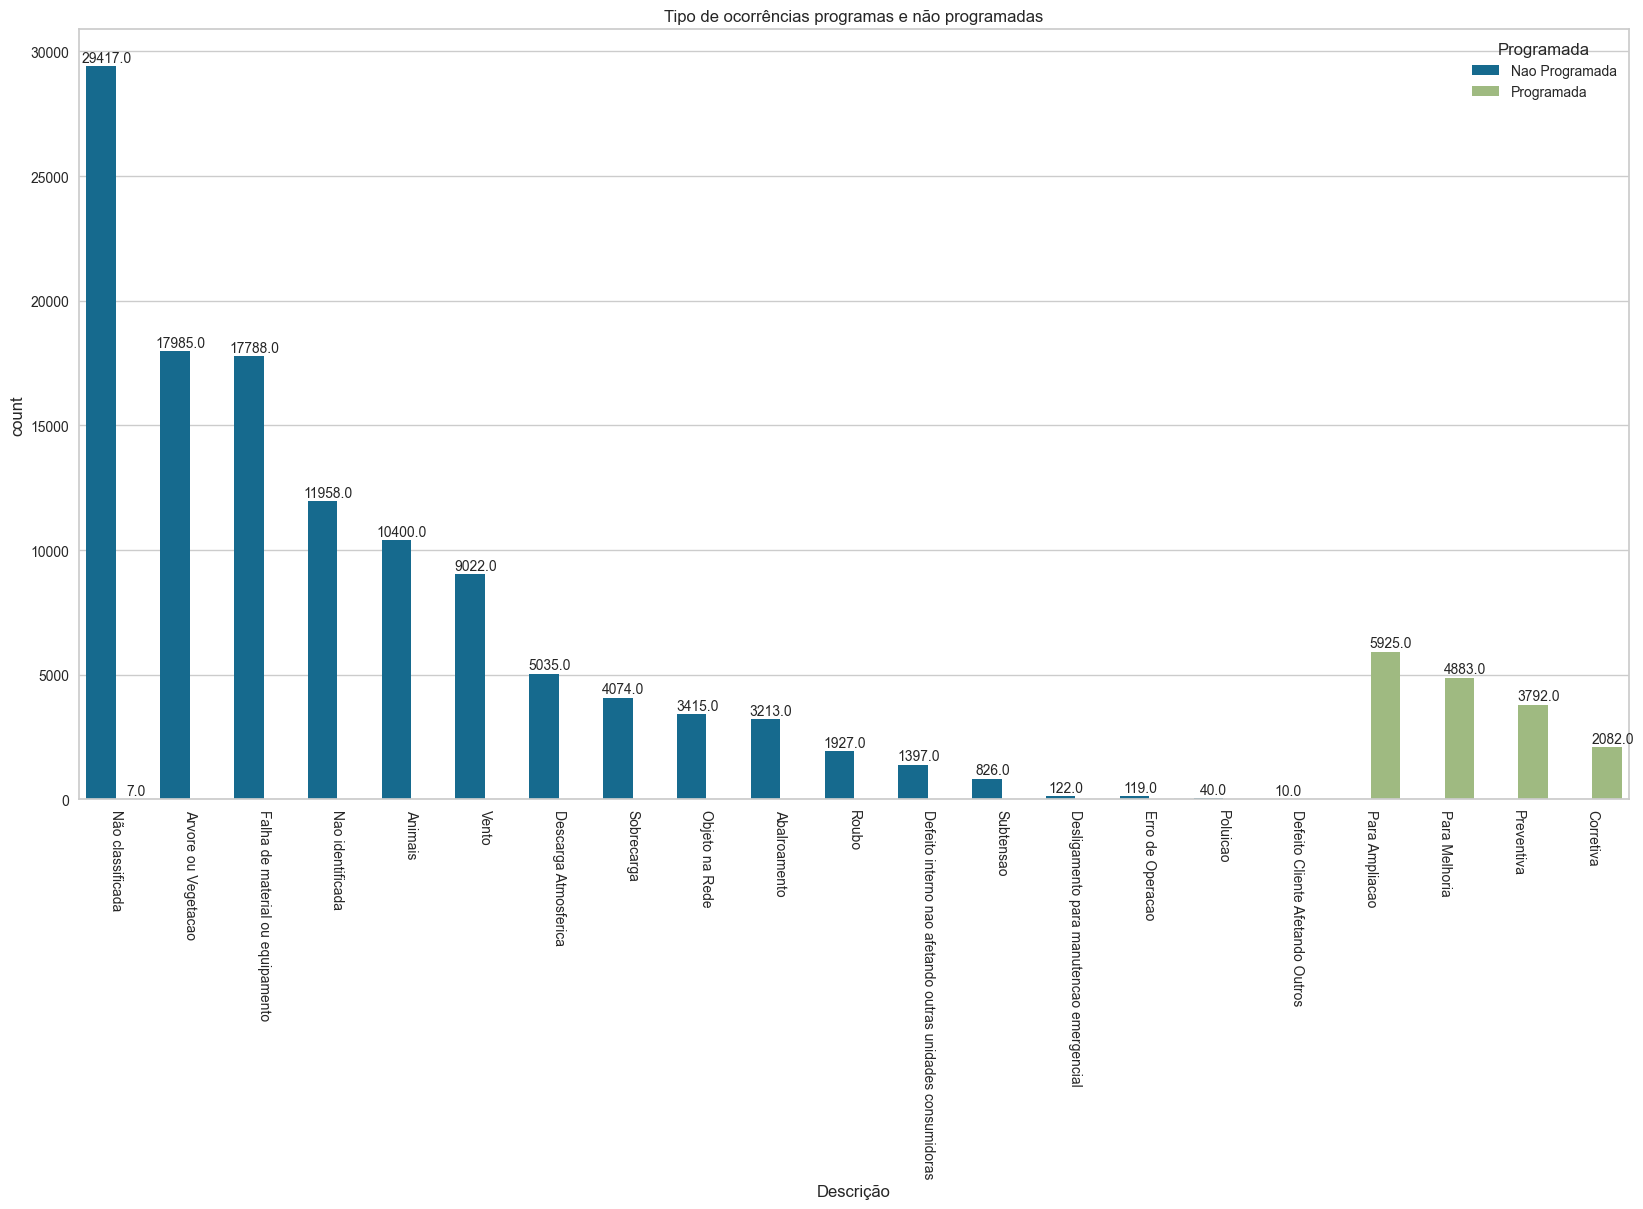

In [428]:

fig, ax = plt.subplots(figsize=(20,10))
ax=sns.barplot(teste, x='Descrição', y='count', hue='Programada')
for bar in ax.patches:
  ax.annotate(text =bar.get_height(),
                  xy = (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center',
                  va='center',
                  size=10,
                  xytext=(4, 6),
                  textcoords='offset points')
plt.xticks(rotation=-90)
plt.title('Tipo de ocorrências programas e não programadas')
plt.show()

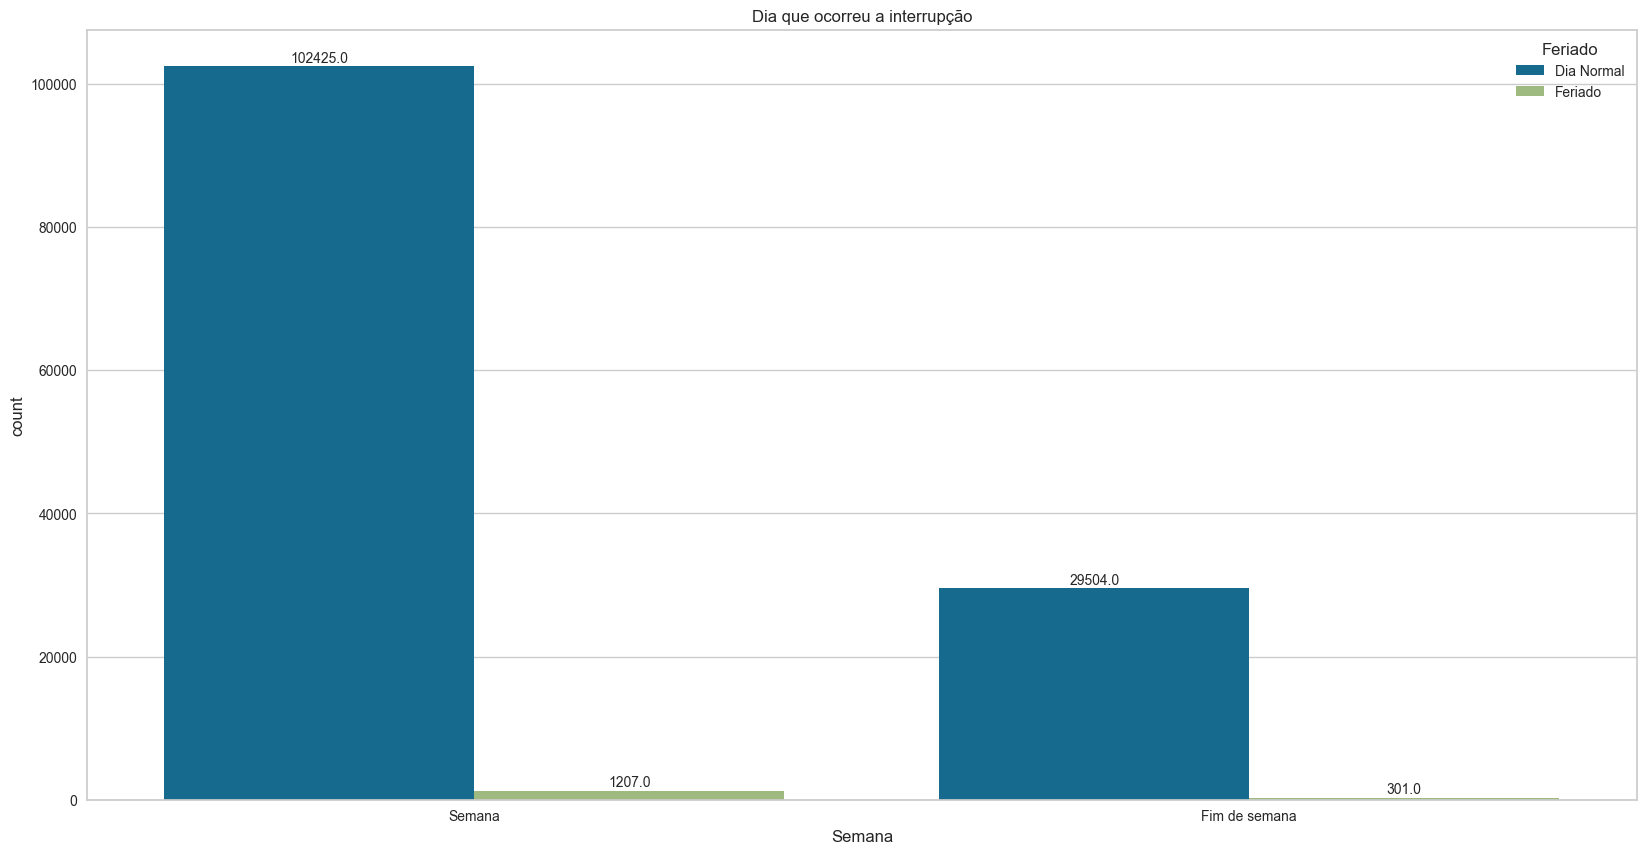

In [429]:


fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(df, x="Semana", hue="Feriado")
for bar in ax.patches:
  ax.annotate(text = bar.get_height(),
                  xy = (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center',
                  va='center',
                  size=10,
                  xytext=(0, 6),
                  textcoords='offset points')
plt.title('Dia que ocorreu a interrupção')
plt.show()

In [430]:
def intervalo(tempo):
    if(tempo <59):
            return "Menos de 1 hora"
    elif(tempo >=60 and tempo <239):
            return "Entre 1 e 4 horas"
    elif(tempo >=239.0 and tempo <1439.0):
            return "Entre 4 horas e 1 dia"
    elif(tempo >=1439.0 and tempo <10079.0):
            return "Entre 1 dia e 1 semana"
    else:
           return "Mais de 1 semana"

df['Periodo']=df['Tempo Total'].apply(intervalo)
lista=['Menos de 1 hora', 'Entre 1 e 4 horas', 'Entre 4 horas e 1 dia' ,'Entre 1 dia e 1 semana','Mais de 1 semana']

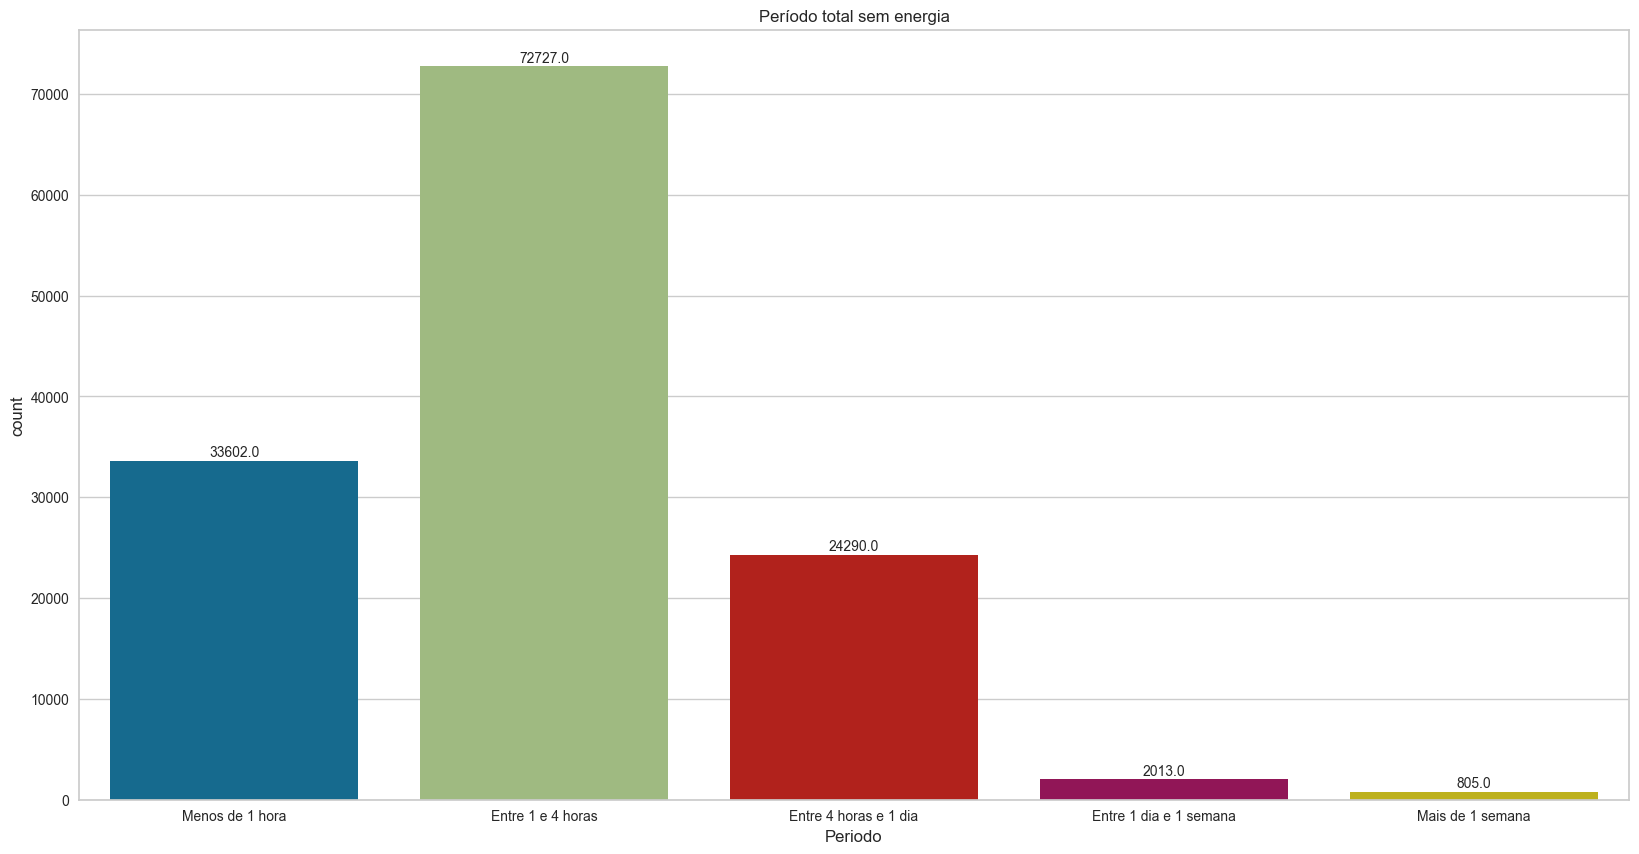

In [431]:
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(df, x='Periodo', order=lista)
for bar in ax.patches:
  ax.annotate(text = bar.get_height(),
                  xy = (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center',
                  va='center',
                  size=10,
                  xytext=(0, 6),
                  textcoords='offset points')
plt.title('Período total sem energia')
plt.show()

In [432]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [433]:
df=df.drop(columns=['_id','DscFatoGeradorInterrupcao', 'NumConsumidorConjunto'])

In [434]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#DscAlimentadorSubestacao
le.fit(df.DscAlimentadorSubestacao) 
df.DscAlimentadorSubestacao = le.transform(df.DscAlimentadorSubestacao)

#Int/Ext
le.fit(df.Int_Ext) 
df.Int_Ext = le.transform(df.Int_Ext)

# Programada
le.fit(df.Programada) 
df.Programada = le.transform(df.Programada)

#Tipo
le.fit(df.Tipo) 
df.Tipo = le.transform(df.Tipo)

#Descrição
le.fit(df.Descrição) 
df.Descrição = le.transform(df.Descrição)

#Descrição
le.fit(df.Semana) 
df.Semana = le.transform(df.Semana)

#Descrição
le.fit(df.Feriado) 
df.Feriado = le.transform(df.Feriado)

#DscAlimentadorSubestacao
le.fit(df.DscAlimentadorSubestacao) 
df.DscAlimentadorSubestacao = le.transform(df.DscAlimentadorSubestacao)


In [435]:
corr = df.corr()
corr

,DscAlimentadorSubestacao,IdeMotivoInterrupcao,NumNivelTensao,NumUnidadeConsumidora,Int_Ext,Programada,Tipo,Descrição,Semana,Feriado,Tempo Total
DscAlimentadorSubestacao,1.000000,-0.000581,0.048056,-0.008643,-0.002279,-0.000466,-0.003776,-0.015784,0.009327,0.004341,0.006336
IdeMotivoInterrupcao,-0.000581,1.000000,0.141127,0.071684,-0.157024,-0.115360,-0.058554,0.065653,0.077401,-0.033412,0.179036
NumNivelTensao,0.048056,0.141127,1.000000,0.182004,-0.033893,-0.103740,-0.063872,-0.195343,-0.006215,-0.000099,0.038863
NumUnidadeConsumidora,-0.008643,0.071684,0.182004,1.000000,-0.150257,-0.024799,0.057017,0.022633,-0.004776,-0.002527,-0.067141
Int_Ext,-0.002279,-0.157024,-0.033893,-0.150257,1.000000,0.009575,-0.019257,-0.011040,-0.018239,0.003929,0.014130
Programada,-0.000466,-0.115360,-0.103740,-0.024799,0.009575,1.000000,-0.667518,0.230889,0.064114,-0.031635,-0.041103
Tipo,-0.003776,-0.058554,-0.063872,0.057017,-0.019257,-0.667518,1.000000,-0.005921,-0.045711,0.029029,-0.033938
Descrição,-0.015784,0.065653,-0.195343,0.022633,-0.011040,0.230889,-0.005921,1.000000,0.047120,-0.016868,0.002985
Semana,0.009327,0.077401,-0.006215,-0.004776,-0.018239,0.064114,-0.045711,0.047120,1.000000,0.006099,0.032833
Feriado,0.004341,-0.033412,-0.000099,-0.002527,0.003929,-0.031635,0.029029,-0.016868,0.006099,1.000000,-0.015881


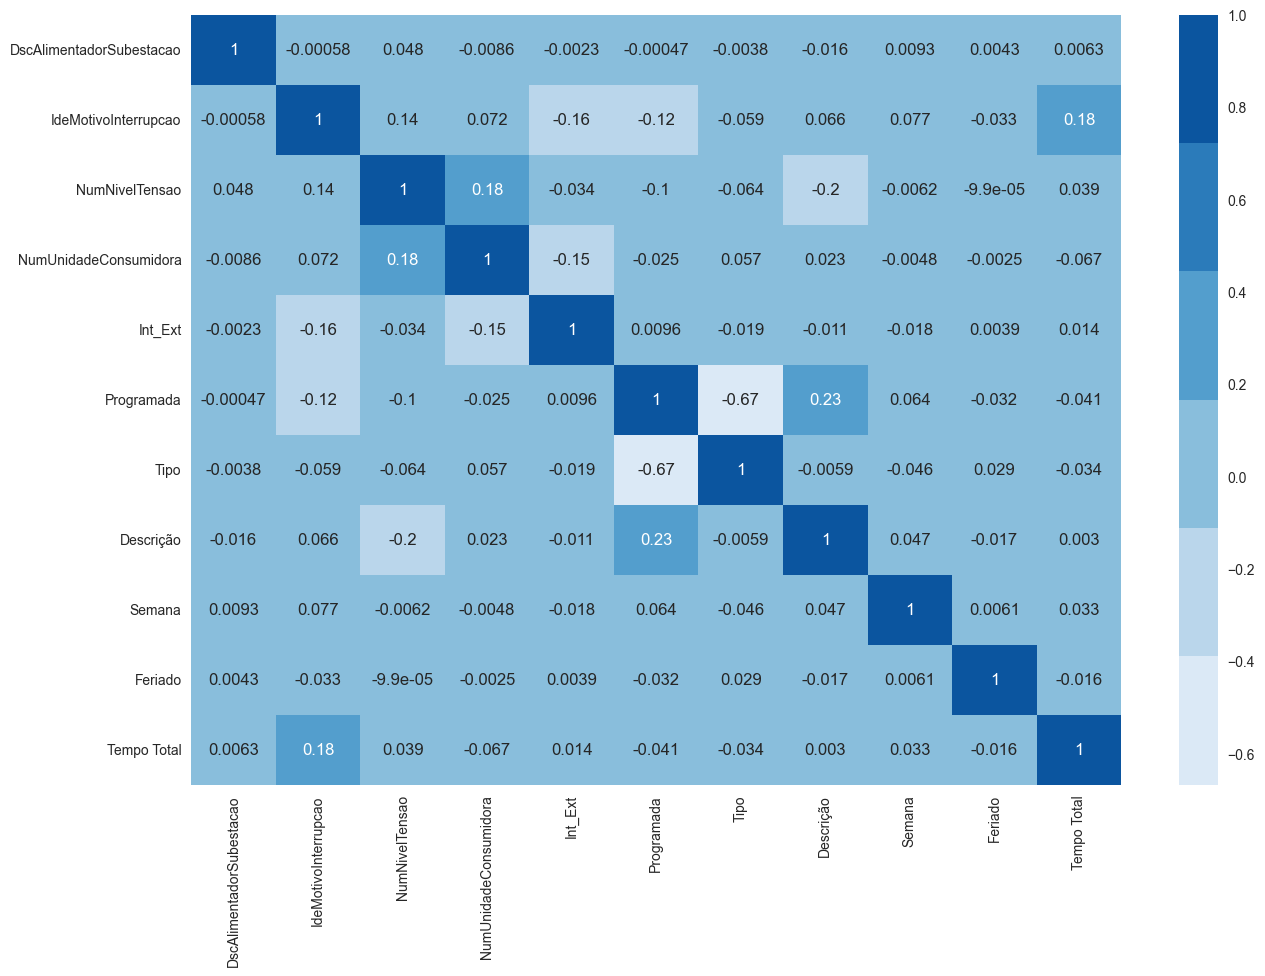

In [436]:
#Vamos ver a correlação graficamente
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr, cmap=sns.color_palette("Blues"), annot=True);

Considerando as três variáveis com maior correlação com tempo total

In [437]:
x=df[['IdeMotivoInterrupcao', 'NumNivelTensao','Semana']]
y = df['Tempo Total']

#Separando os dados de Treino e Teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

#Criando um Objeto de Regressão Linear
lr = LinearRegression()

#Treinando o Modelo
lr.fit(x_train,y_train)

#Verificando o resultado
r_sq = lr.score(x_test, y_test)
print('Coeficiente de Determinação (R²):', r_sq)

Coeficiente de Determinação (R²): 0.039131794000031084


Considerando apenas o IdeMotivoInterrupcao

In [438]:
x=df[['IdeMotivoInterrupcao']]
y = df['Tempo Total']

#Separando os dados de Treino e Teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

#Criando um Objeto de Regressão Linear
lr = LinearRegression()

#Treinando o Modelo
lr.fit(x_train,y_train)

#Verificando o resultado
r_sq = lr.score(x_test, y_test)
print('Coeficiente de Determinação (R²):', r_sq)

Coeficiente de Determinação (R²): 0.03845336418192735


Considerando todas as variáveis

In [439]:
x= df[['DscAlimentadorSubestacao','IdeMotivoInterrupcao','NumNivelTensao','NumUnidadeConsumidora','Int_Ext','Programada','Tipo','Descrição','Semana','Feriado']]
y = df['Tempo Total']

#Separando os dados de Treino e Teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

#Criando um Objeto de Regressão Linear
lr = LinearRegression()

#Treinando o Modelo
lr.fit(x_train,y_train)

#Verificando o resultado
r_sq = lr.score(x_test, y_test)
print('Coeficiente de Determinação (R²):', r_sq)

Coeficiente de Determinação (R²): 0.051484287258942385


In [440]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(x)
PCA_ds = pd.DataFrame(pca.transform(x), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,133437.0,1.260671e-12,10413.972515,-8683.142621,-8682.330319,-8681.276107,14093.930375,25819.561971
col2,133437.0,-2.726364e-15,994.703431,-676.256007,-297.206278,-61.936192,-28.461100,73473.577850
col3,133437.0,2.685469e-15,270.581038,-494.502626,-237.903547,33.537046,247.861908,532.782170


Elbow Method to determine the number of clusters to be formed:


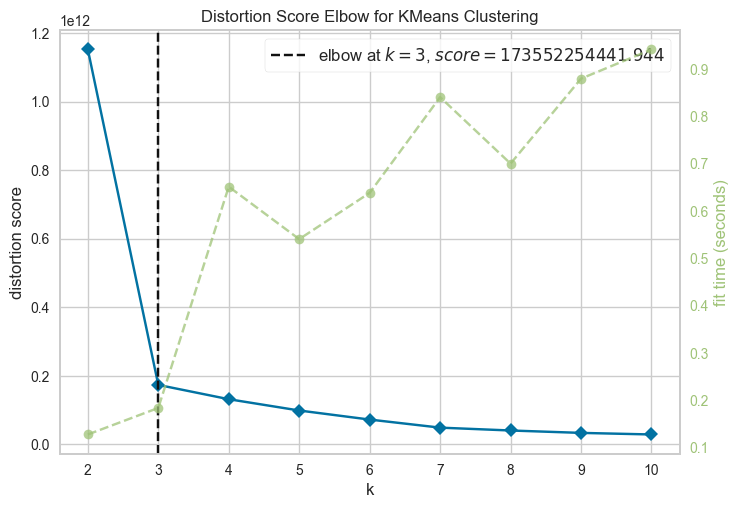

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [441]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [442]:
from sklearn.cluster import KMeans

#Initialize the class object
kmeans = KMeans(n_clusters= 3, max_iter=300, n_init=10)

#predict the labels of clusters.
label = kmeans.fit_predict(PCA_ds)

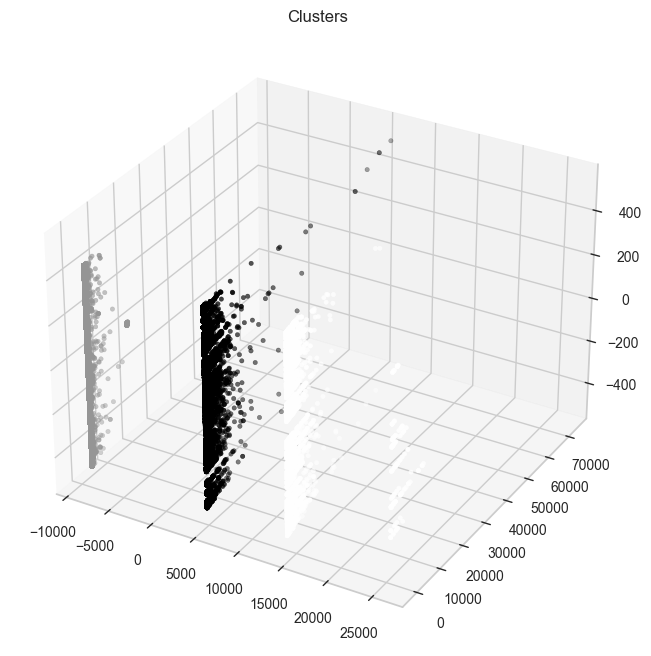

In [443]:
#Plotting the clusters
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(PCA_ds['col1'],PCA_ds['col2'],PCA_ds['col3'], s=10, c=label, marker='o')
ax.set_title("Clusters")
plt.show()